## Analyse syntaxique avec Spacy et Stanford CoreNLP (via NLTK)

### Analyseur syntaxique en constituants avec Stanford CoreNLP (et NLTK)

La librairie CoreNLP de l'Université Stanford contient l'un des meilleurs analyseurs syntaxiques en constituants pour le français et l'anglais. Cette librairie a été développée par l'équipe du professeur Chris Manning en Java et en Scala. Voir https://corenlp.run/ pour une démo en ligne de ce logiciel.

Toutefois, une interface Python permet d'accéder aux fonctionnalités de cet analyseur par l'entremise de NLTK. La démarche à suivre pour configurer son environnement est :

* avoir une installation récente de NLTK sur son ordinateur
* avoir une version de Java 1.8+ sur son ordinateur
* télécharger le fichier jar de CoreNLP (https://stanfordnlp.github.io/CoreNLP/download.html, version actuelle 4.1.0)
* décompresser le fichier (par ex. au même niveau que ce notebook)
* définir dans votre code les liens vers :
 * le répertoire de CoreNLP,
 * le fichier jar principal
 * le modèle utilisé. Par ex. pour le français --> stanford-corenlp-4.1.0-models-french.jar.
 
Dans les exemples suivants, nous utilisons le modèle anglais de l'analyse en constituants. Pour débuter l'utilisation de CoreNLP, on doit démarrer un processus (server) qui roule localement, habituellement par défaut sur le port 9000. Tous les appels à la librairie CoreNLP sont gérées par ce serveur.

Petit config path java

In [1]:
import os
java_path = "C:/Program Files/Java/jre1.8.0_271/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [2]:
import os
from nltk.parse.corenlp import CoreNLPServer

corenlp_path = os.path.join("./", "stanford-corenlp-4.2.0/")
corenlp_jarfile = "stanford-corenlp-4.2.0.jar"
corenlp_models_jarfile = "stanford-corenlp-4.2.0-models.jar"
corenlp_models_french_jarfile = "stanford-corenlp-4.2.0-models-frenchhhh.jar"

server = CoreNLPServer(
   os.path.join(corenlp_path, corenlp_jarfile),
   os.path.join(corenlp_path, corenlp_models_jarfile),    
)

server.start()

Par la suite, on crée une instance d'analyseur (CoreNLPParser) qui gère les appels au serveur CoreNLP et retourne les résultats de l'analyseur syntaxique.

Commençons par quelques exemples relativement simples.

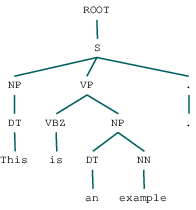

In [3]:
from nltk.parse.corenlp  import CoreNLPParser

def parse_corenlp(sentence):
    parser = CoreNLPParser()
    return next(parser.raw_parse(sentence))
    
sent1 = "This is an example."
sent2 = "RTX 2080 was NVIDIA’s best graphics card."
sent3 = "Video games will soon get more expensive"

parse_corenlp(sent1)

Parfois, les **groupes du noms** peuvent contenir plusieurs mots. Voir ici le premier groupe NP décrivant Victor Hedman.



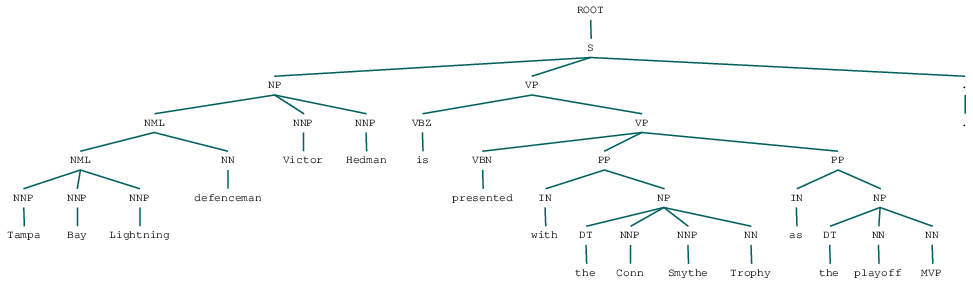

In [4]:
parse_corenlp("Tampa Bay Lightning defenceman Victor Hedman is presented with the Conn Smythe Trophy as the playoff MVP.")


Une phrase peut contenir plusieurs **groupes prépositionnels.**



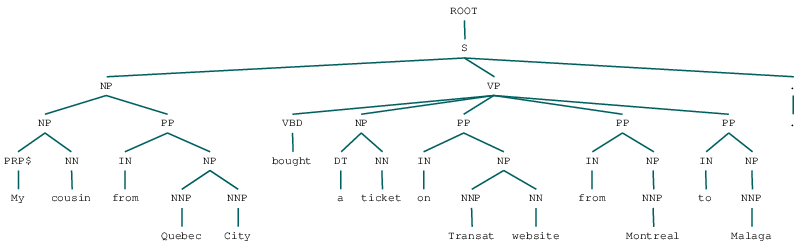

In [5]:
parse_corenlp("My cousin from Quebec City bought a ticket on Transat website from Montreal to Malaga .")


Un exemple de **conjonction de phrases.** On retrouve 2 structures de phrases dans l'arbre syntaxique.



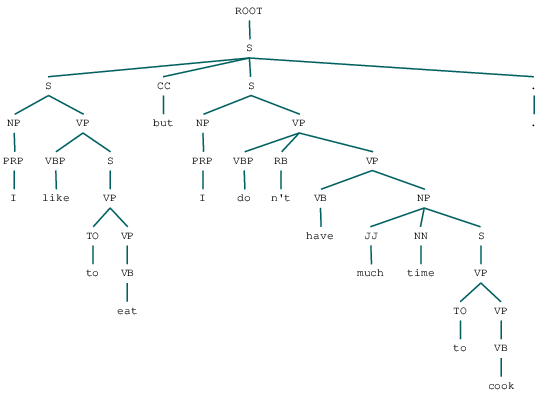

In [6]:
conj_sent1 = "I like to eat but I don't have much time to cook."
parse_corenlp(conj_sent1)

Un autre exemple ou la **conjonction** est au niveau du groupe du nom.



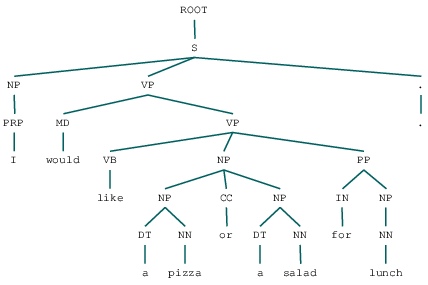

In [7]:
conj_sent2 = "I would like a pizza or a salad for lunch."
parse_corenlp(conj_sent2)


Structures de **phrases (clauses) subordonnées** avec le symbole SBAR.



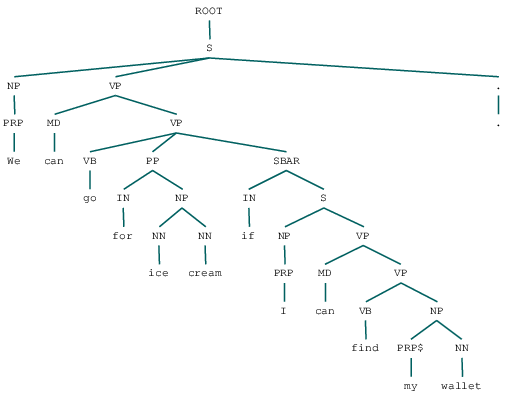

In [8]:
sub_sent1 = "We can  go for ice cream if I can find my wallet."
sub_sent2 = "I can stay out until the clock strikes twelve."
parse_corenlp(sub_sent1)

Nous avons ici une **analyse de question** dont le symbole non-terminal SBARQ (question q1) qui indique que la phrase est une question. La clause principale de la question est regroupée sous le symbole SQ.

Voir également le résultat de la question q2 qui a une structure complètement différente. À noter que si vous reformulez la question sous la forme "Why does a... make sense", on retrouve une structure similaire à celle de q1.

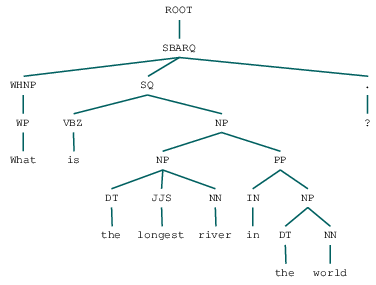

In [9]:
q1 = "What is the longest river in the world?" 
q2 = "Why a dedicated Zoom device makes sense" 
parse_corenlp(q1)

Les **phrases impératives** commencent habituellement par un verbe. Habituellement...



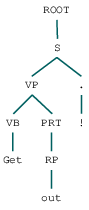

In [10]:
imperative1 = "Get out!" 
imperative2 = "Bring me a glass of water." 
imperative3 = "Go clean your room."
imperative4 = "Clean your room."
imperative5 = "Please forgive my meticulousness but you have spelled it wrong."
parse_corenlp(imperative1)

Tout comme pour le POS tagging, faites attention aux textes, comme les titres de bulletins de nouvelles, dont les mots sont **en majuscules**.



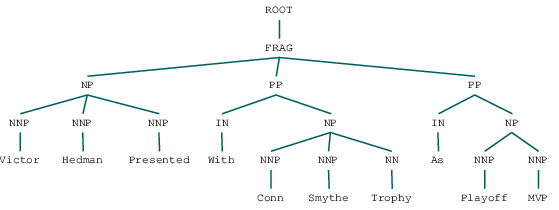

In [11]:
parse_corenlp("Victor Hedman Presented With Conn Smythe Trophy As Playoff MVP")


Faites également attention aux **phrases multilingues.**



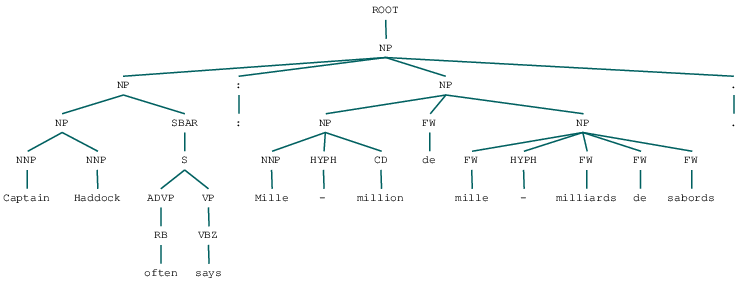

In [12]:
parse_corenlp("Captain Haddock often says: Mille-million de mille-milliards de sabords.")


### Chunking
Malheureusement, les options sont limitées du côté du chunking.

* Avec Spacy, nous avons seulement accès aux chunks correspondant à des groupes du nom. Ce qui peut être parfois limitatif.
* Avec NLTK, des expressions régulières sont utilisées pour découper une séquence de mots en utilisant les étiquettes grammaticales (POS tag). Voir http://www.nltk.org/howto/chunk.html pour quelques exemples.
* Rien à signaler du côté de Stanford CoreNLP.
* Une autre option serait d'utiliser OpenNLP.
Un exemple avec **Spacy**

In [13]:
import spacy

text = "Tampa Bay Lightning defenceman Victor Hedman is presented with the Conn Smythe Trophy as the playoff most valuable player."
analyzer_spacy = spacy.load("en_core_web_sm")
doc = analyzer_spacy(text)

for chunk in doc.noun_chunks:
    print(chunk.text)

Tampa Bay Lightning defenceman Victor Hedman
the Conn Smythe Trophy
the playoff
most valuable player


### Analyse de dépendances
Spacy offre un analyseur de dépendances efficace offrant des modèles pour plusieurs langues.

In [14]:
import spacy
analyzer_en = spacy.load("en_core_web_sm")

In [15]:
import pandas as pd
from spacy import displacy

def analyze_dependencies(sentence, analyzer=analyzer_en): 
    doc = analyzer(sentence)
    display_dep(doc)
    displacy.render(doc, style="dep", jupyter=True)
    
def display_dep(doc):
    pos_tags = {
        'tokens': [token.text for token in doc], 
        'pos tag': [token.pos_ for token in doc],
        'dependency': [token.dep_ for token in doc],
        'head word': [token.head.text for token in doc],
    }
    df = pd.DataFrame.from_dict(pos_tags, orient='index')
    display(df)

In [16]:
sent = "I shot an elephant in my pajamas"
analyze_dependencies(sent)

,0,1,2,3,4,5,6
tokens,I,shot,an,elephant,in,my,pajamas
pos tag,PRON,VERB,DET,NOUN,ADP,DET,NOUN
dependency,nsubj,ROOT,det,dobj,prep,poss,pobj
head word,shot,shot,elephant,shot,shot,pajamas,in


In [17]:
sent = "Apple is looking at buying U.K. startup for $1 billion"
analyze_dependencies(sent)


,0,1,2,3,4,5,6,7,8,9,10
tokens,Apple,is,looking,at,buying,U.K.,startup,for,$,1,billion
pos tag,PROPN,AUX,VERB,ADP,VERB,PROPN,NOUN,ADP,SYM,NUM,NUM
dependency,nsubj,aux,ROOT,prep,pcomp,compound,dobj,prep,quantmod,compound,pobj
head word,looking,looking,looking,looking,at,startup,buying,buying,billion,billion,for


## Analyse de dépendances en français


In [19]:
import spacy
analyzer_fr = spacy.load("fr_core_news_sm")

In [20]:
sent_fr1 = "Je mange une pomme."
analyze_dependencies(sent_fr1, analyzer=analyzer_fr)

,0,1,2,3,4
tokens,Je,mange,une,pomme,.
pos tag,PRON,VERB,DET,NOUN,PUNCT
dependency,nsubj,ROOT,det,obj,punct
head word,mange,mange,pomme,mange,mange


In [24]:
sent_fr2 = "Un artiste réalise la plus grande peinture du monde."
analyze_dependencies(sent_fr2, analyzer=analyzer_fr)

,0,1,2,3,4,5,6,7,8,9
tokens,Un,artiste,réalise,la,plus,grande,peinture,du,monde,.
pos tag,DET,NOUN,VERB,DET,ADV,ADJ,NOUN,DET,NOUN,PUNCT
dependency,det,nsubj,ROOT,det,advmod,amod,obj,case,nmod,punct
head word,artiste,réalise,réalise,peinture,grande,peinture,réalise,monde,peinture,réalise


In [25]:
sent_fr3 = "Quand le professeur part-il ?"
analyze_dependencies(sent_fr3, analyzer=analyzer_fr)

,0,1,2,3,4,5
tokens,Quand,le,professeur,part,-il,?
pos tag,SCONJ,DET,NOUN,NOUN,PRON,PUNCT
dependency,case,det,amod,ROOT,dep,punct
head word,part,professeur,part,part,part,-il


## Analyse de dépendances avec Stanford CoreNLP et NLTK

In [27]:
from nltk.parse.corenlp import CoreNLPDependencyParser

# Exemple tiré de la documentation NLTK
a_sentence = 'I shot an elephant in my pajamas.'
dep_parser_corenlp = CoreNLPDependencyParser()

parse, = dep_parser_corenlp.raw_parse(a_sentence)

for governor, dep, dependent in parse.triples():
    print(governor, dep, dependent)

('shot', 'VBD') nsubj ('I', 'PRP')
('shot', 'VBD') obj ('elephant', 'NN')
('elephant', 'NN') det ('an', 'DT')
('shot', 'VBD') obl ('pajamas', 'NNS')
('pajamas', 'NNS') case ('in', 'IN')
('pajamas', 'NNS') nmod:poss ('my', 'PRP$')
('shot', 'VBD') punct ('.', '.')
